# pandas Matplotlib features

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('default')

In [2]:
covid_df = pd.read_csv('data/covid_df.csv', index_col=False)

![alt text](dst3-u1-md13_5_1.png)

### to create graph

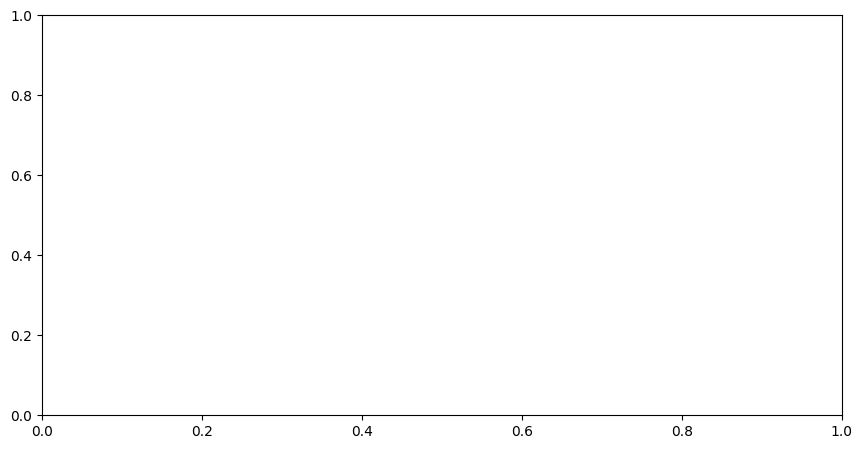

In [7]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])

# .scatter()
* x= column name for axis x
* y= column name for axis y
* s= marker size
* marker= marker type
* * 'o' points
* * '^' triangle
* c= marker color

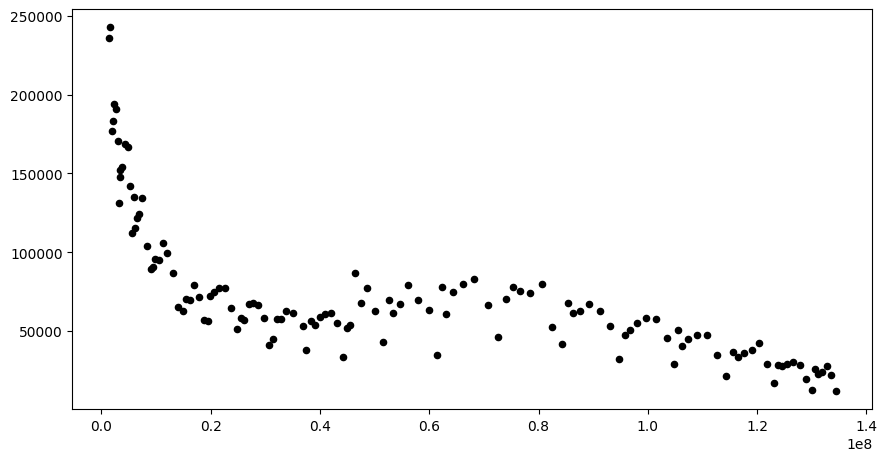

In [10]:
us_data = covid_df[covid_df['country'] == 'United States']
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'],
    y=us_data['daily_confirmed'],
    s=20,
    marker='o',
    color='black'
);

### pie()
* x= column name as 100%
* labels= idexes as % of 100%
* autopct= format for example '%.1f%%' or '%.2f%%'
* explode= offset for each lables

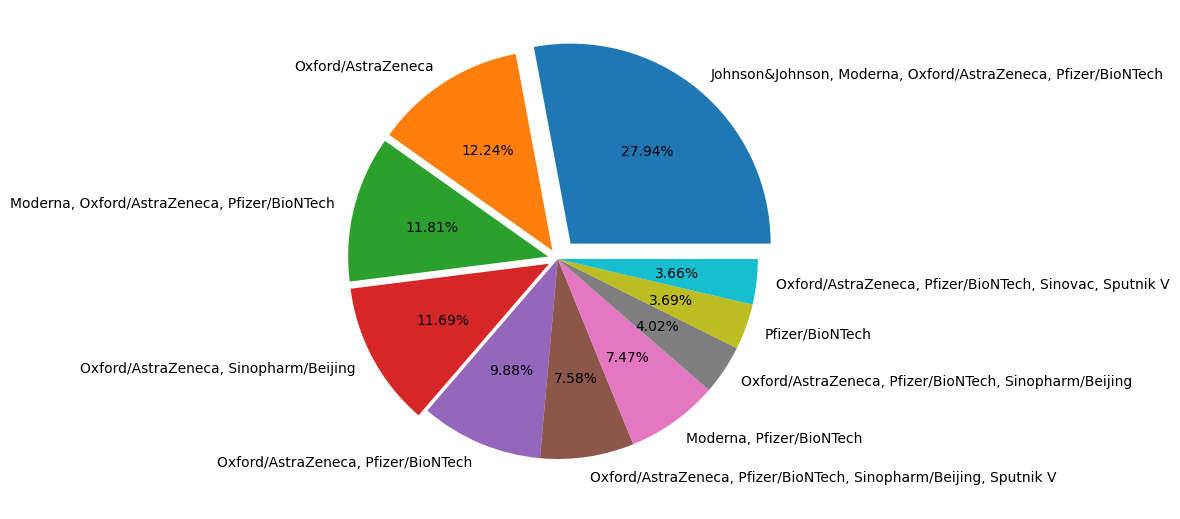

In [26]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    x=vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.2f%%',
    explode=[0.1, 0.05, 0.05, 0.05, 0, 0, 0, 0, 0, 0]
);

### .bar()
* x= column name for axis x
* height= column height
* width= column width
* color= column color

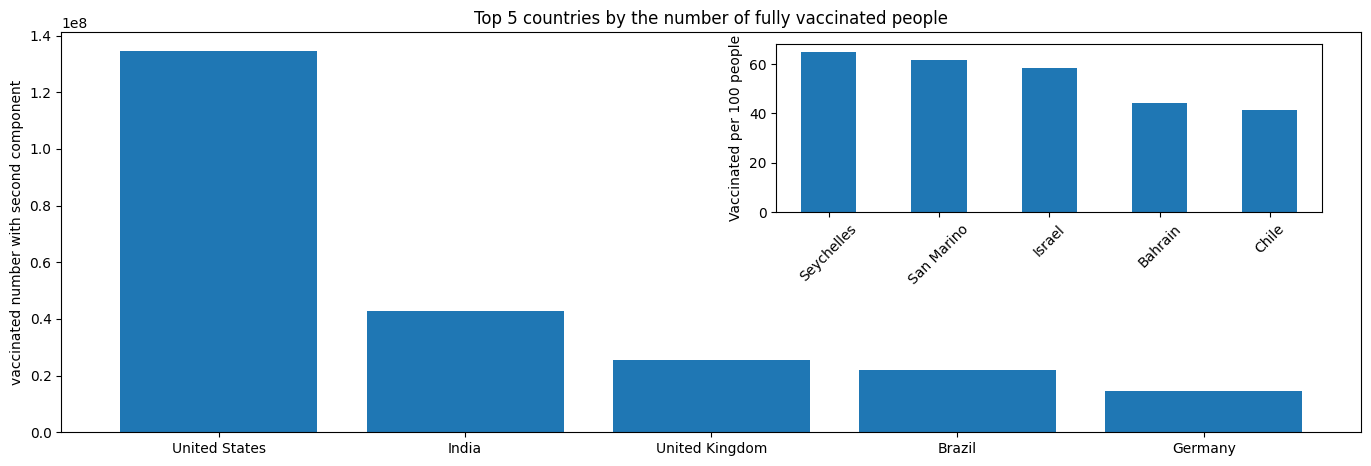

In [38]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(
    x=vacc_country.index,
    height=vacc_country
);
main_axes.set_ylabel('vaccinated number with second component')
main_axes.set_title('Top 5 countries by the number of fully vaccinated people')

insert_axes = fig.add_axes([0.55, 0.55, 0.42, 0.42])
insert_axes.bar(
    x=vacc_country_per_hundred.index,
    height=vacc_country_per_hundred,
    width=0.5
);
insert_axes.set_ylabel('Vaccinated per 100 people')
insert_axes.xaxis.set_tick_params(rotation=45)


### .hist()
* x= column name for axis x
* bins= number of graph column
* orientation='vertival' by default
* color=color

### .supplots()
* nrows= rows number
* ncols= column number
* figsize= graph size

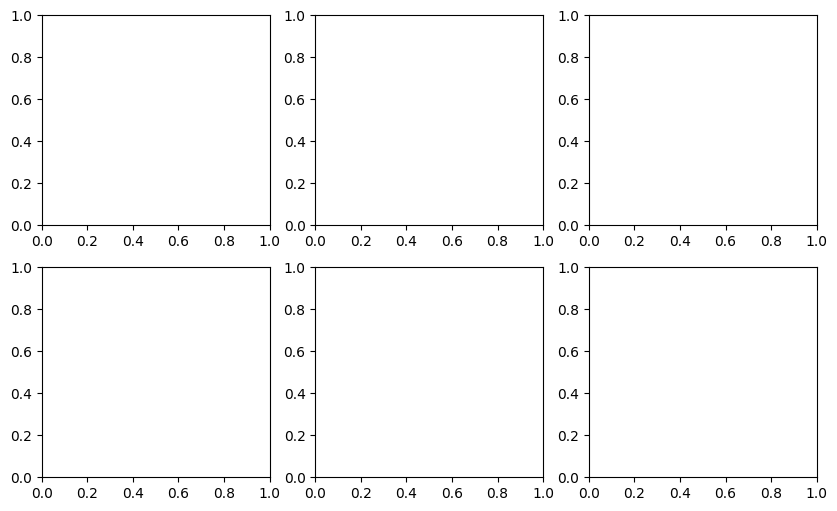

In [51]:
fig_0, axes_0 = plt.subplots(
    nrows=2,
    ncols=3,
    figsize=(10, 6)
);

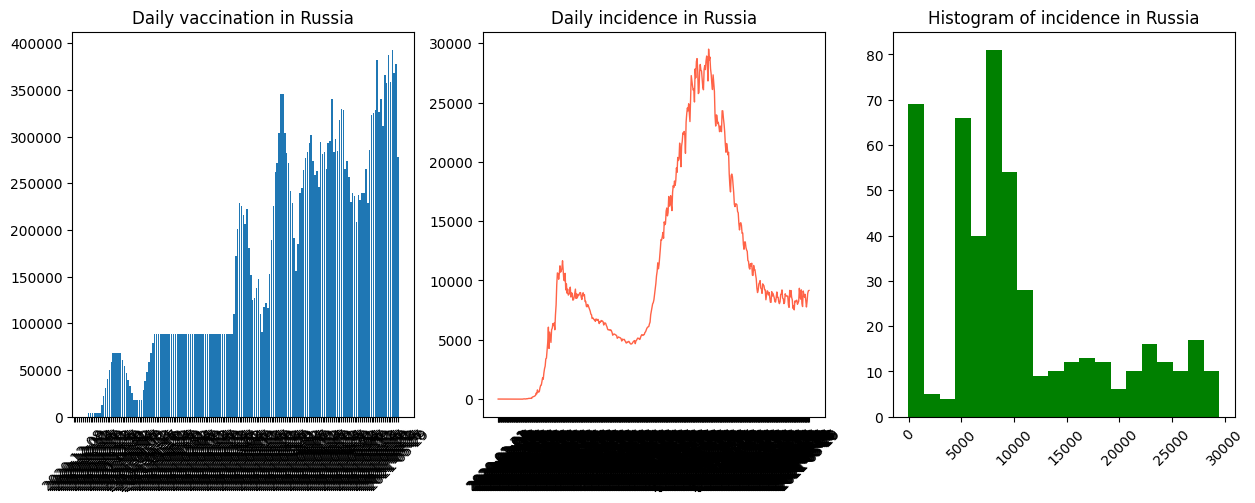

In [60]:
rus_data = covid_df[covid_df['country'] == 'Russia']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

axes[0].bar(
    x=rus_data['date'],
    height=rus_data['daily_vaccinations'],
    label='Vaccinated number'
);
axes[0].set_title('Daily vaccination in Russia')
axes[0].xaxis.set_tick_params(rotation=45)

axes[1].plot(
    rus_data['date'],
    rus_data['daily_confirmed'],
    label='Confirmed number',
    lw=1,
    color="tomato"
);
axes[1].set_title('Daily incidence in Russia')
axes[1].xaxis.set_tick_params(rotation=45)

axes[2].hist(
    x=rus_data['daily_confirmed'],
    label=['Incidence number'],
    bins=20,
    color='green'
);
axes[2].set_title('Histogram of incidence in Russia')
axes[2].xaxis.set_tick_params(rotation=45)

### additional settings

* .axes.set_title() - graph name
* * (fontsize=n)
* .axes.set_xlabel() - axis x name
* .axes.set_ylabel() - axis y name
* .axes.set_xticks() - add marks axis x
* .axes.set_yticks() - add marks axis y
* .axes.xaxis.set_tick_params() - managing the parameters of marks on axis x
* .axes.yaxis.set_tick_params() - managing the parameters of marks on axis y
* .axes.legend() - display legend
* .axes.grid() - display grid